<a href="https://colab.research.google.com/github/BrunaFerreira/Coursera_AI_for_Medical_Diagnosis/blob/master/Lab1_Counting_Labels_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contando rótulos (labels) e definindo função de custo (loss function)
* AI for Medicine Course 1 Week 1 lecture exercises
* AI4M_C1_W1_lecture_ex_02


In [1]:
# Import pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Le arquivo .csv lendo dados de treinamento
train_df = pd.read_csv("/content/drive/MyDrive/0_Cursos/1. Coursera/AI Medicine /Code/data/train-small.csv")

## Contando Rótulos (Labels)
Uma maneira de evitar que desbalanceamento das classes afete a função de perda é ponderar as perdas de forma diferente. Para escolher os pesos, primeiro você precisa calcular as frequências das classes.

* Contagem de cada rótulo (label);

In [3]:
# Contando o número de instancias para cada classe
class_counts = train_df.sum().drop(['Image','PatientId'])

* Frequência em cada classe:

In [4]:
for column in class_counts.keys():
    print(f"A classe {column} contém {train_df[column].sum()} amostras")

A classe Atelectasis contém 106 amostras
A classe Cardiomegaly contém 20 amostras
A classe Consolidation contém 33 amostras
A classe Edema contém 16 amostras
A classe Effusion contém 128 amostras
A classe Emphysema contém 13 amostras
A classe Fibrosis contém 14 amostras
A classe Hernia contém 2 amostras
A classe Infiltration contém 175 amostras
A classe Mass contém 45 amostras
A classe Nodule contém 54 amostras
A classe Pleural_Thickening contém 21 amostras
A classe Pneumonia contém 10 amostras
A classe Pneumothorax contém 38 amostras


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


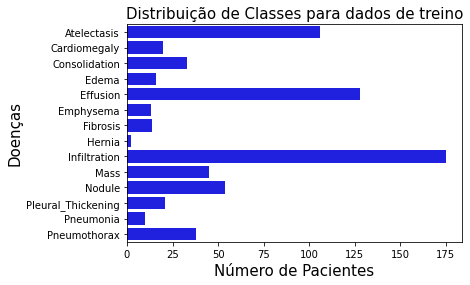

In [5]:
# Grafico das distribuições
sns.barplot(class_counts.values, class_counts.index, color = 'b')
plt.title('Distribuição de Classes para dados de treino', fontsize=15)
plt.xlabel('Número de Pacientes', fontsize=15)
plt.ylabel('Doenças', fontsize=15)
plt.show()

# Função de perda ponderada - Weighted Loss function

Primeiro definirá um conjunto hipotético de rótulos verdadeiros e, um conjunto de previsões.

In [6]:
# Matriz com 4 valores de rótulo binários, 3 positivos e 1 negativo
y_true = np.array(
        [[1],
         [1],
         [1],
         [0]])
print(f"y_true: \n{y_true}")

y_true: 
[[1]
 [1]
 [1]
 [0]]


### Dois modelos
- O Modelo 1 sempre produz um 0,9 para qualquer exemplo fornecido.
- O Modelo 2 sempre produz um 0,1 para qualquer exemplo que for fornecido.

O arquivo contém:
* os nomes das radiografias de tórax (coluna "Image"
* colunas preenchidas com uns e zeros, que  identificam quais diagnósticos foram dados com base em cada radiografia.

In [7]:
# Faça previsões de modelo que são sempre 0,9 para todos os exemplos
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(f"y_pred_1: \n{y_pred_1}")
print()
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(f"y_pred_2: \n{y_pred_2}")

y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]

y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


### Problemas com a função de perda regular
O objetivo do aprendizado aqui é perceber que, com uma função de perda regular (não uma perda ponderada), o modelo que sempre produz 0,9 tem uma perda menor (desempenho melhor) do que o modelo 2.

Isso ocorre porque:
-  há desbalanceamento de classes, em que 3 dos 4 rótulos são 1.
- Se os dados estivessem perfeitamente balanceados (dois rótulos eram 1 e dois rótulos eram 0), o modelo 1 e o modelo 2 teriam a mesma perda. Cada um obteria dois exemplos corretos e dois exemplos incorretos.
- Função de perda regular implica que o modelo 1 é melhor do que o modelo 2.

### Observe as deficiências de uma perda não ponderada regular

Lembrando que o modelo 1 sempre prevê 0,9 e o modelo 2 sempre prevê 0,1, veja a função de perda regular (não ponderada) para cada modelo.

In [8]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_reg_1: {loss_reg_1:.4f}")

loss_reg_1: 2.6187


In [9]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.4f}")

loss_reg_2: 7.0131


In [10]:
print(f"Quando o modelo 1 sempre prevê 0.9, a perda regular é {loss_reg_1:.4f}")
print(f"Quando o modelo 2 sempre prevê 0.1, a perda regular é {loss_reg_2:.4f}")

Quando o modelo 1 sempre prevê 0.9, a perda regular é 2.6187
Quando o modelo 2 sempre prevê 0.1, a perda regular é 7.0131


A função de perda dá uma perda maior quando as previsões são sempre 0.1, porque os dados são desbalanceados:
- três rótulos de `1`
- um rótulo de` 0`.

Dado um desbalanceamento de classe com rótulos mais positivos, a função de perda regular implica que o modelo com a previsão mais alta de 0,9 tem um desempenho melhor do que o modelo com a previsão mais baixa de 0,1

### Como uma perda ponderada trata os dois modelos da mesma maneira
Com uma função de perda ponderada,será obtida a mesma perda ponderada quando as previsões forem todas 0,9 ou quando forem todas 0,1.
- Uma previsão de 0,9 está a 0,1 de distância do rótulo positivo de 1.
- Uma previsão de 0,1 está a 0,1 de distância do rótulo negativo de 0
- Portanto, os modelos 1 e 2 são "simétricos" ao longo do ponto médio de 0,5, em uma reta numérica entre 0 e 1.

### Equação de perda ponderada
Calcule a perda para o zero-ésimo rótulo (coluna no índice 0).

- A perda é composta por dois termos:

    - $loss_{pos}$: perda em que o rótulo real é positivo (os exemplos positivos).
    - $loss_{neg}$: perda em que o rótulo real é negativo (os exemplos negativos).

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

- Para obter o peso positivo, conte quantos rótulos NEGATIVOS estão presentes, dividido pelo número total de exemplos.

Nesse caso, há um rótulo negativo e quatro exemplos no total.

Da mesma forma, o peso negativo é a fração de rótulos positivos.

Execute a próxima célula para definir os pesos positivos e negativos.

In [11]:
# calculate the positive weight as the fraction of negative labels
w_p = 1/4

# calculate the negative weight as the fraction of positive labels
w_n = 3/4

print(f"positive weight w_p: {w_p}")
print(f"negative weight w_n {w_n}")

positive weight w_p: 0.25
negative weight w_n 0.75


### Perda ponderada do modelo 1
Execute as próximas duas células para calcular os dois termos de perda separadamente.

Aqui, `loss_1_pos` e` loss_1_neg` são calculados usando as previsões `y_pred_1`.

In [12]:
# Calculate and print out the first term in the loss function, which we are calling 'loss_pos'
loss_1_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_1 ))
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.0790


In [13]:
# Calculate and print out the second term in the loss function, which we're calling 'loss_neg'
loss_1_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_1 ))
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 1.7269


In [14]:
# Sum positive and negative losses to calculate total loss
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.8060


### Perda ponderada do modelo 2

Agora faça os mesmos cálculos para quando as previsões forem de `y_pred_2 '. Calcule os dois termos da função de perda ponderada e some-os.

In [15]:
# Calculate and print out the first term in the loss function, which we are calling 'loss_pos'
loss_2_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_2))
print(f"loss_2_pos: {loss_2_pos:.4f}")

loss_2_pos: 1.7269


In [16]:
# Calculate and print out the second term in the loss function, which we're calling 'loss_neg'
loss_2_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_2_neg: {loss_2_neg:.4f}")

loss_2_neg: 0.0790


In [17]:
# Sum positive and negative losses to calculate total loss when the prediction is y_pred_2
loss_2 = loss_2_pos + loss_2_neg
print(f"loss_2: {loss_2:.4f}")

loss_2: 1.8060


### Compare a perda ponderada do modelo 1 e do modelo 2

In [18]:
print(f"When the model always predicts 0.9, the total loss is {loss_1:.4f}")
print(f"When the model always predicts 0.1, the total loss is {loss_2:.4f}")

When the model always predicts 0.9, the total loss is 1.8060
When the model always predicts 0.1, the total loss is 1.8060


### O que você percebe?
Como você usou uma perda ponderada, a perda calculada é a mesma, quer o modelo sempre preveja 0,9 ou sempre preveja 0,1.

Você também deve ter notado que, ao calcular cada termo da perda ponderada separadamente, há um pouco de simetria ao comparar os dois conjuntos de previsões.

In [19]:
print(f"loss_1_pos: {loss_1_pos:.4f} \t loss_1_neg: {loss_1_neg:.4f}")
print()
print(f"loss_2_pos: {loss_2_pos:.4f} \t loss_2_neg: {loss_2_neg:.4f}")

loss_1_pos: 0.0790 	 loss_1_neg: 1.7269

loss_2_pos: 1.7269 	 loss_2_neg: 0.0790


Mesmo que haja um desequilíbrio de classe, onde há 3 rótulos positivos, mas apenas um rótulo negativo, a perda ponderada é responsável por isso dando mais peso ao rótulo negativo do que ao positivo.

### Perda ponderada para mais de uma classe

Na tarefa desta semana, você calculará a perda ponderada de várias classes (quando houver mais de uma classe de doença que seu modelo está aprendendo a prever). Aqui, você pode praticar o trabalho com matrizes numpy 2D, o que o ajudará a implementar a perda ponderada de várias classes na tarefa avaliada.

Você trabalhará com um conjunto de dados que possui duas classes de doenças (duas colunas)

In [20]:
# View the labels (true values) that you will practice with
y_true = np.array(
        [[1,0],
         [1,0],
         [1,0],
         [1,0],
         [0,1]
        ])
y_true

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

### Escolhendo eixo = 0 ou eixo = 1
Você usará `numpy.sum` para contar o número de vezes que a coluna` 0` tem o valor 0.
Primeiro, observe a diferença quando você define ` axis` = 0 versus ` axis` = 1

In [21]:
# See what happens when you set axis=0
print(f"using axis = 0 {np.sum(y_true,axis=0)}")

# Compare this to what happens when you set axis=1
print(f"using axis = 1 {np.sum(y_true,axis=1)}")

using axis = 0 [4 1]
using axis = 1 [1 1 1 1 1]


Observe que se você escolher ` axis = 0`, a soma é obtida para cada uma das duas colunas. Isso é o que você deseja fazer neste caso. Se você definir `axis = 1`, a soma é obtida para cada linha.

### Calcule os pesos
Anteriormente, você inspecionava visualmente os dados para calcular a fração de rótulos negativos e positivos. Aqui, você pode fazer isso programaticamente.

In [22]:
# set the positive weights as the fraction of negative labels (0) for each class (each column)
w_p = np.sum(y_true == 0,axis=0) / y_true.shape[0]
w_p

array([0.2, 0.8])

In [23]:
# set the negative weights as the fraction of positive labels (1) for each class
w_n = np.sum(y_true == 1, axis=0) / y_true.shape[0]
w_n

array([0.8, 0.2])

Na tarefa, você treinará um modelo para tentar fazer previsões úteis. Para tornar este exemplo mais fácil de seguir, você fingirá que seu modelo sempre prevê o mesmo valor para todos os exemplos.

In [24]:
# Set model predictions where all predictions are the same
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
y_pred

array([[0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7]])

omo antes, calcule os dois termos que constituem a função de perda. Observe que você está trabalhando com mais de uma classe (representada por colunas). Nesse caso, existem duas classes.

Comece calculando a perda para a classe `0`.


$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

Visualize a coluna zero para os pesos, valores verdadeiros e previsões que você usará para calcular a perda das previsões positivas.

In [25]:
# Print and view column zero of the weight
print(f"w_p[0]: {w_p[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_p[0]: 0.2
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [26]:
# calculate the loss from the positive predictions, for class 0
loss_0_pos = -1 * np.sum(w_p[0] * 
                y_true[:, 0] * 
                np.log(y_pred[:, 0])
              )
print(f"loss_0_pos: {loss_0_pos:.4f}")

loss_0_pos: 0.9632


Visualize a coluna zero para os pesos, valores verdadeiros e previsões que você usará para calcular a perda das previsões negativas.

In [27]:
# Print and view column zero of the weight
print(f"w_n[0]: {w_n[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_n[0]: 0.8
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [28]:
# Calculate the loss from the negative predictions, for class 0
loss_0_neg = -1 * np.sum( 
                w_n[0] * 
                (1 - y_true[:, 0]) * 
                np.log(1 - y_pred[:, 0])
              )
print(f"loss_0_neg: {loss_0_neg:.4f}")

loss_0_neg: 0.2853


In [29]:
# add the two loss terms to get the total loss for class 0
loss_0 = loss_0_neg + loss_0_pos
print(f"loss_0: {loss_0:.4f}")

loss_0: 1.2485


Agora você está familiarizado com o corte de matriz que você usaria quando houver várias classes de doenças armazenadas em uma matriz bidimensional.

#### Agora é sua vez!
* Você pode calcular a perda para a classe (coluna) `1`?

In [30]:
# calculate the loss from the positive predictions, for class 1
loss_1_pos = -1 * np.sum(w_p[1] * 
                y_true[:, 1] * 
                np.log(y_pred[:, 1])
              )
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.2853


In [31]:
# Calculate the loss from the negative predictions, for class 1
loss_1_neg = -1 * np.sum( 
                w_n[1] * 
                (1 - y_true[:, 1]) * 
                np.log(1 - y_pred[:, 1])
              )
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 0.9632


In [32]:
# add the two loss terms to get the total loss for class 0
loss_1 = loss_1_pos+loss_1_neg

In [33]:
loss_1

1.2485181986117349

### Observação
Os dados para as duas classes (duas colunas) assim como as previsões foram escolhidos de forma que você acabe obtendo a mesma perda ponderada para as duas categorias.
  - Em geral, você espera calcular diferentes valores de perda ponderada para cada categoria de doença, pois as previsões e dados do modelo variam de uma categoria para outra.

Se desejar ajuda, clique na célula verde "Solução" abaixo para revelar a solução.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution</b></font>
</summary>
<p>
<code>
-- # calculate the loss from the positive predictions, for class 1
loss_1_pos = -1 * np.sum(w_p[1] * 
                y_true[:, 1] * 
                np.log(y_pred[:, 1])
              )
print(f"loss_1_pos: {loss_1_pos:.4f}")
    
-- # Calculate the loss from the negative predictions, for class 1
loss_1_neg = -1 * np.sum( 
                w_n[1] * 
                (1 - y_true[:, 1]) * 
                np.log(1 - y_pred[:, 1])
              )
print(f"loss_1_neg: {loss_1_neg:.4f}")

-- # add the two loss terms to get the total loss for class 1
loss_1 = loss_1_neg + loss_1_pos
print(f"loss_1: {loss_1:.4f}")
    </code>
</p>
